## Description

We have a dataset of Chicago bike share project named as Divvy Cylistic. Data consists of ride start and end in timestamp format, station names, stations' numeric IDs, ride IDs and stations' GPS locations.

Our aim is to find out any patterns we can, to help convert casual members to annual members. For this purpose we need to find how annual and casual members are using the bikes and then brainstorm ideas to convert them.

For starters we will look at:

1) A comparison of number of rides started by annual members and casual members.

2) A comparison of cumulative ride duration by annual members and casual members.

3) A comparison of mean ride duration by annual members and casual members.

In [3]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r'H:\Fouzan\Coursera\Google Data Project\Zipped\Extracted Files\CSV Files\202004-divvy-tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [15]:
df = df.iloc[:,[2,3,-1]]

In [16]:
#changing timestamped columns to datetime, creating a trip duration column and converting into seconds 

df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')
df['tripduration'] = df['ended_at'] - df['started_at']
df['tripduration'] = df['tripduration'] / np.timedelta64(1, 's')

In [17]:
#converting following columns to string to split date and time in seperate columns
df['started_at'] = df['started_at'].astype('str')
df['ended_at'] = df['ended_at'].astype('str')

#splitting 
df[['start_date','start_time']] = df.started_at.str.split(' ', expand = True)
df[['end_date','end_time']] = df.ended_at.str.split(' ', expand = True)

Finalizing the data for analysis

In [22]:
#df = df.drop(['started_at','ended_at','start_time','end_time'],axis = 1)
#df = df.loc[~(df['tripduration'] < 00.0)]

In [21]:
df1 = df.loc[(df['member_casual'] == 'member')]
df2 = df.loc[(df['member_casual'] == 'casual')]

Comparing the total number of daily rides by annual members and casual users.

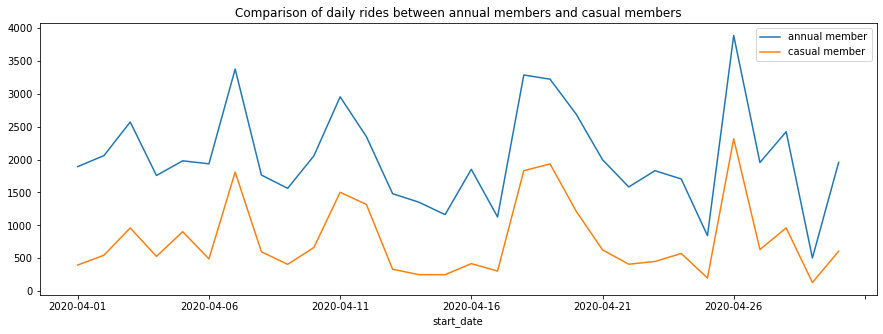

In [23]:
df1 = df1.rename(columns = {'tripduration':'annual member tripduration'})
df2 = df2.rename(columns = {'tripduration':'casual member tripduration'})
df1 = df1.groupby(['start_date'])['annual member tripduration'].count()
df2 = df2.groupby(['start_date'])['casual member tripduration'].count()
df3 = pd.concat([df1,df2],axis = 1)
df3 = df3.rename(columns = {'annual member tripduration':'annual member', 'casual member tripduration':'casual member'})
df3.plot.line(figsize = (15,5), title = 'Comparison of daily rides between annual members and casual members');

Comparison of cumulative trip duration on daily between annual members and casual members

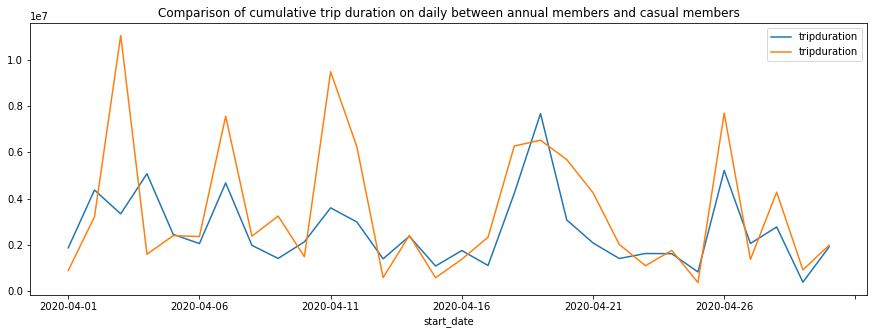

In [31]:
df4 = df01.groupby(['start_date']).sum()
df5 = df02.groupby(['start_date']).sum()
#df4 = df4.rename(columns = {'annual member tripduration':'annual member'})
#df5 = df5.rename(columns = {'casual member tripduration':'casual member'})
pd.concat([df4,df5], axis = 1).plot.line(figsize = (15,5), title = 'Comparison of cumulative trip duration on daily between annual members and casual members');

Comparing the daily cumulative ride duration by annual and casual members.

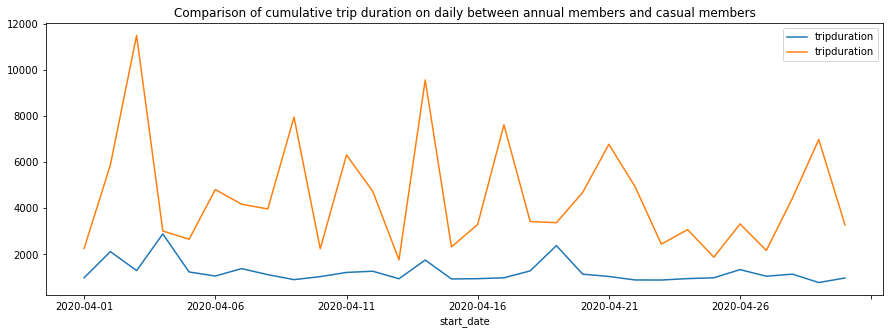

In [32]:
df3 = df01.groupby(['start_date']).mean()
df6 = df02.groupby(['start_date']).mean()
#df3 = df3.rename(columns = {'tripduration':'annual member'})
#df6 = df6.rename(columns = {'tripduration':'casual member'})
pd.concat([df3,df6], axis = 1).plot.line(figsize = (15,5), title = 'Comparison of cumulative trip duration on daily between annual members and casual members');

### Results

So looking at the graphs above we can infer the following.
1. Firstly it is obvious that the number of rides for annual members vastly exceeds that of casual members.
2. Casual members mostly incline towards longer ride durations.
3. Similar to point number 2, mean ride duration shows the same trend as cumulative ride durations.